In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import os
import random
from collections import Counter, defaultdict
from itertools import product, combinations
import math
import cv2
from sklearn.model_selection import train_test_split

random.seed(42)

%matplotlib inline

In [2]:
import keras
from keras.layers import Input, Conv2D, Lambda, average, Dense, Flatten,MaxPooling2D, BatchNormalization, Dropout, Activation, Subtract, subtract
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import numpy.random as rng

/home/anurag/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
IMAGE_SIZE = (70, 70)

def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

def process_image(image_location):
    """
        Given the image location, process the image
    """
    # print(image_location)
    
    image = cv2.imread(image_location)
    
    if image.shape[0] != IMAGE_SIZE[0] or image.shape[1] != IMAGE_SIZE[1]:
        # print("Resizing the image: {0}".format(image_location))
        resized_image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # get the edges from the image
    edges = auto_canny(gray)
    #print(edges.shape)
    
    
    # assert(denoised != edges)
    # add the two images in a weighted manner
    weighted_sum = cv2.addWeighted(gray, 0.8, edges, 0.2, 0)
       
    return gray

In [4]:
type_locations = {"b": ["bb", "wb"], "n": ["bn", "wn"], "k": ["bk", "wk"], "p": ["bp", "wp"], "q": ["bq", "wq"], "r": ["br", "wr"]}
type_name_to_label = { "p":0, "b":1, "n":2, "r":3, "q": 4, "k":5 }

## The below cell need to be replaced with the location of the new data

In [5]:
def get_features_labels(data_path):
    X, y = [], []
    features_with_labels = []
    
    for type_name in type_locations:
        for folder_name in type_locations[type_name]:
            piece_type_folder = os.path.join(data_path, folder_name)
            for f in (os.listdir(piece_type_folder)):
                if f.endswith(".jpg"): 
                    

                    img_file_loc = os.path.join(piece_type_folder, f)
                    print(img_file_loc)
                    grayscale_image = process_image(img_file_loc)
                    actual_image = grayscale_image
                    grayscale_image = grayscale_image[..., np.newaxis]
                    label = type_name_to_label[type_name]
                    features_with_labels.append({"feature": grayscale_image, "label": label, "image": actual_image})   
                    
    random.shuffle(features_with_labels)
    #print(X[0][0])
    #print(X[0][1])
    X = [x["feature"] for x in features_with_labels]
    y = [x["label"] for x in features_with_labels]
    images = [x["image"] for x in features_with_labels]
    
    X = np.array(X)
    X = X.astype('float32')
    X /= 255

    return X, np.array(y), images

In [6]:
X_train, y_train, _ = get_features_labels("/home/anurag/AR/data/23March/train")
X_test, y_test, test_images = get_features_labels("/home/anurag/AR/data/23March/test")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

/home/anurag/AR/data/23March/train/bb/bb_original_b25_f_8.jpg_0dced8bb-95b3-4f68-bbf6-e40ad5197cd4.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b18_f_8.jpg_43316227-e50e-4440-a13a-51667879c02a.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b3_c_8.jpg_bae4ecd0-cd4b-47fd-918d-73ab8960ce74.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b39_f_8.jpg_089f4bed-d8ec-4748-ae44-be3b64b59cba.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b59_h_4.jpg_27f408e3-e428-4706-903e-ec1911d7e8c3.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b53_e_7.jpg_3fe980c5-74f4-4253-b9c5-0022765a57b8.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b34_f_8.jpg_a99a289a-53ed-49db-9bbc-6c702562b5a4.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b8_f_8.jpg_318b26c3-203e-4a1d-9a7b-2d1ab95c9b52.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b8_f_8.jpg_a4464ac7-589a-423b-9dbb-0d1438f470f9.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B4_c_2.jpg_ced0eff8-8cfa-4

/home/anurag/AR/data/23March/train/bb/bb_original_b6_f_5.jpg_fe334acc-e6c7-40f0-8932-10a7ac1d2396.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b32_f_8.jpg_984ba65d-a6b2-44e9-a97e-ddd7886df58d.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b52_e_7.jpg_623a7e42-0a98-49e4-8304-b3215b755809.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b9_f_8.jpg_0802e08e-e313-4388-96a7-2518c521c8bd.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b49_f_8.jpg_80803cb5-08fe-4b2e-bf52-783a6763d886.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b22_f_8.jpg_7082056d-ab37-45d9-9fd3-8c2910a010d0.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b50_e_7.jpg_361f5f7d-f4bf-4889-ab91-85a0136b9c7e.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b57_h_4.jpg_013596f3-38ed-4545-87e3-59e90e014bb5.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B1_f_6.jpg_164c20f4-b5ed-4497-bd18-0492b8aa603d.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b45_f_8.jpg_1a6ee8a5-b373-

/home/anurag/AR/data/23March/train/bb/bb_original_b1_c_8.jpg_eef4a0af-9724-47ff-a1bd-51bdec1ae04e.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b16_f_8.jpg_a289a281-7b5b-4031-984c-1552ba7ffef0.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B2_e_7.jpg_93c45032-af2f-430d-83d3-cb045c140c74.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B4_e_1.jpg_5b3c07e1-30d4-4f90-8c29-51e4650e4266.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B4_c_2.jpg_2a1a0cd5-48b5-4dd9-800b-a128e8d09a8d.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b65_h_4.jpg_75c99b86-edb7-4863-b40e-a5aab40504b9.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B3_h_4.jpg_c4a7461a-0d5e-4e23-a400-a3360e667981.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B2_d_3.jpg_c09b1f46-aab7-4c3d-9086-8eaaa51988fa.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b49_f_8.jpg_d08a168e-6e23-45c8-9e65-4d9d15e0f1d8.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b58_h_4.jpg_2c5e3381-bf9c-4a3

/home/anurag/AR/data/23March/train/bb/bb_original_b46_f_8.jpg_986e68d7-a699-4b8c-abf0-310cf77f43ef.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b36_f_8.jpg_f1da69c2-2e27-4e58-be35-dc1dc49509c6.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B3_h_4.jpg_46d4c1d0-f163-4b4c-8144-92660fe93912.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b52_e_7.jpg_4f7d87e9-c247-42b6-b1e1-450a62857ef8.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b3_f_8.jpg_a1dd7c8d-8e0d-449b-94e0-3eed6462c669.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b51_e_7.jpg_5c873855-7ec4-4588-8c4c-b6cc4799fb8a.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b63_h_4.jpg_b08c56cf-5ba2-4332-87ba-eff23d607bff.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b32_f_8.jpg_0240088c-669b-4134-a6bb-e04568eddd0e.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b9_f_5.jpg_1e3cc4e8-39e0-4611-8f04-6479486d1da4.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b2_c_8.jpg_f76047be-021e-4

/home/anurag/AR/data/23March/train/bb/bb_original_B1_f_6.jpg_c2900da4-180f-4098-9999-d2bbbca00b07.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b5_f_5.jpg_f21a8734-e074-4f16-901a-86ed98b3fb5a.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B4_c_2.jpg_126960f8-23f5-4d02-9ffe-36407d821d6c.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_B4_c_2.jpg_29cb3526-b840-44f2-85c3-6cd58bba80d0.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b22_f_8.jpg_1fe903b3-d377-435e-9aa8-b64e0477c4b3.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b26_f_8.jpg_e1596688-a854-49ba-80d3-dc99eafb34ab.jpg
/home/anurag/AR/data/23March/train/bb/bb_original_b6_f_8.jpg_86e10ef2-33c4-42f5-b4da-aff64b59dd31.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b52_c_5.jpg_7a7d43af-e3c8-4e8a-b552-785abcd777e3.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b54_c_5.jpg_d6691c7c-93e5-47e9-9f4d-a609e1d1f630.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b29_f_1.jpg_d4e10a3a-a6ae-4b

/home/anurag/AR/data/23March/train/wb/wb_original_b45_b_5.jpg_a93f0efc-25d6-4728-b824-270ea03e8990.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b53_c_5.jpg_40ee9bbb-00d1-498f-9154-c3df5deca41b.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b9_f_1.jpg_8e8982eb-a49c-46c6-a587-3bd45c49d78b.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_B1_e_2.jpg_a71e9799-0374-4087-b2c4-c3f4a237d9df.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b10_f_1.jpg_0c3dc069-6ef8-46a9-9625-914bbada77f6.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b20_f_1.jpg_80d21c6c-3669-4166-a179-d5206e4fe2e4.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b31_a_3.jpg_f329e1ed-6534-423f-a24a-7e47cf48f4da.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b2_c_1.jpg_b8aed319-b696-4f8f-95d4-2af36ea8af34.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b26_f_1.jpg_b99851cb-7954-4f58-9ed7-e164a38c6197.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_B3_e_3.jpg_6c7b2995-2751-4

/home/anurag/AR/data/23March/train/wb/wb_original_b13_f_1.jpg_3e85a3ff-b78d-417f-9e0a-9ecb0bb3202d.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b45_b_5.jpg_803be64d-349e-48eb-a17c-88c9a75894d1.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b38_f_1.jpg_eb3d31e3-c730-4d5b-b7ec-b87488959363.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b35_f_1.jpg_099ee0d3-5735-4701-bf0d-0aa98457f666.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b33_a_3.jpg_4186b2a9-5141-4020-a9f8-70704aaa1581.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b9_c_1.jpg_e6a779a7-4ba8-4408-b83c-1ff8cb8cddb9.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b32_f_1.jpg_f9d55ac3-8c09-4d09-9028-47f2031dfa09.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_B3_e_3.jpg_333e2264-d235-4cfe-8c6b-9282389233b0.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b54_c_5.jpg_01a0b6cd-81c4-48fa-a69f-84d0565da4b0.jpg
/home/anurag/AR/data/23March/train/wb/wb_original_b16_f_1.jpg_4b94958f-8012

/home/anurag/AR/data/23March/train/bn/bn_original_b57_e_3.jpg_80e41aeb-ee6a-4252-a132-8d051f815b81.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b29_d_7.jpg_d3935dfe-6ff7-4070-a047-68b25d3f6e97.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b56_e_3.jpg_46919f39-6c96-48bc-b9dc-be1f6e26320a.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b51_f_7.jpg_03314e85-e2d7-4491-9d18-edba45c09f14.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b5_b_8.jpg_869c93d2-e3c4-4f4b-bba6-b056b87ef779.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN1_f_4.jpg_138ca94b-2dfd-4bdc-8716-46da75344fb8.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b19_g_8.jpg_0cfff0fc-1e0a-4e23-91c9-5d802f654f16.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b26_g_8.jpg_befdd2b5-2beb-448e-860d-33c4d61344fb.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b3_g_8.jpg_0e3aa7ef-94e0-48a1-b839-1ef8ffad0cf1.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN4_f_6.jpg_51875e25-e8f2

/home/anurag/AR/data/23March/train/bn/bn_original_KN3_e_3.jpg_c19920dc-4770-4078-8eae-248f800664f5.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b1_b_8.jpg_deebcbfe-50fd-4ffc-8a8b-03b6440cb5cd.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b30_d_7.jpg_4ff4915e-5e4e-4b4b-ac43-a2db987e479f.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b50_f_7.jpg_c658d309-81bb-45da-b5df-b107a7cb1504.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b57_e_3.jpg_b948b454-839d-4ba1-9bf4-709df69b4229.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b8_c_6.jpg_dca53eea-72b9-4774-b5d0-2c129c5f35f3.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b40_f_7.jpg_55681370-ef2c-467d-b2aa-c9ad9d758539.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN2_g_2.jpg_f6e4b742-a28d-4b0d-97b7-d3b6bde804c7.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN3_d_7.jpg_493e4e9f-f98b-4388-b41d-c5f7314d3909.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN2_f_7.jpg_8273fb2a-e21c

/home/anurag/AR/data/23March/train/bn/bn_original_b57_e_3.jpg_a3f6a6eb-39d9-43ea-83ac-e5c7f7a273a6.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b38_f_6.jpg_84f9d227-eb33-41f4-8ba0-dca7ed6267fe.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b59_e_3.jpg_26414460-e77c-408e-b3d9-b25d48bc0e1f.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b39_f_6.jpg_e23b0600-94c6-4802-bba3-5ce7581f1df9.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b44_f_6.jpg_a9416f49-74e2-43fb-8cd1-210f8cb21fa4.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b57_e_3.jpg_6941c9a2-0006-4d93-b399-23b97e01cffb.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN4_d_5.jpg_90357ee2-407c-414c-ba13-9f2f8e0bd62c.jpg
/home/anurag/AR/data/23March/train/bn/KN1_b_6.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_KN1_f_4.jpg_d7413e76-cfac-4172-84a9-05039df68a9f.jpg
/home/anurag/AR/data/23March/train/bn/bn_original_b53_f_7.jpg_e7581773-a61b-453c-9f93-ee7c1283ef03.jpg
/home/anurag/AR/data/23

/home/anurag/AR/data/23March/train/wn/wn_original_b20_b_5.jpg_71586b36-7ca3-4bb4-914f-3f7634220104.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b26_g_1.jpg_ac1536cd-21cb-41f0-b3e7-8d81f817783c.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN3_c_6.jpg_c75b962a-d726-4edc-8c1a-9f23b85196a9.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b27_g_1.jpg_3139eee9-3e49-4f4b-90eb-2b43f123a48c.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN3_h_5.jpg_086a456b-f39f-402d-9272-3d6d7eb5168e.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN2_e_5.jpg_e401d87c-e3b3-4d50-829c-b542f2ba8cc5.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN4_g_2.jpg_22a6f2f7-c4c2-49f8-852b-f553bc5f7937.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b6_a_3.jpg_f10daa3a-d9cd-4d34-9029-2efaf16c0b08.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b2_g_1.jpg_fbbd114b-50f0-46f9-b366-c62095583303.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b6_g_1.jpg_9af4cd88-8cb4-

/home/anurag/AR/data/23March/train/wn/wn_original_b10_g_1.jpg_7430df78-566c-4f1b-a4b1-0d1d93e08c0a.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b9_g_1.jpg_d774877a-2766-4163-849c-db7aa34f857c.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b29_g_1.jpg_63a90cbf-f083-4893-a66a-5fdaefed23f0.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN4_g_2.jpg_fa5d48d6-7411-47fb-9180-51176d7fa5e0.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b12_b_5.jpg_5cf9628c-d645-4c70-9864-13a25fb9a405.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b7_g_1.jpg_3d836990-e558-4187-b986-58ba1ac20961.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN4_c_3.jpg_959954b4-3400-4223-a5cd-e171dc0576d7.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b38_g_1.jpg_1341d098-de52-4894-bdfc-0d62a11ccb63.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b18_g_1.jpg_1a0136f0-3aa0-43fd-a7fd-396492fc7b86.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b1_b_1.jpg_4a1339ae-22fb-

/home/anurag/AR/data/23March/train/wn/wn_original_b22_g_1.jpg_970e9d17-8d94-4676-a763-612cefca67bb.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b12_b_5.jpg_34ef4581-aecc-4783-8ee3-b766ac53e429.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN1_d_3.jpg_52810d82-620b-49c3-bae7-56d0abc88c92.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b13_b_5.jpg_f925c219-3f20-451a-b3b4-2981ee435861.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN2_e_5.jpg_57d21f82-d2e5-410a-8607-fe452e1a46ad.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b15_g_1.jpg_d0e84c7a-754f-4bc9-8a22-0a640e69dd34.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN1_d_3.jpg_0e8b90a5-a956-4efd-a228-f0a7a2058861.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b1_b_1.jpg_30bf9dd6-1bb5-4ef6-a070-b347795e164b.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b30_g_1.jpg_2e872af7-8862-4668-8b76-56841a47d289.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN2_e_5.jpg_45a22700-608

/home/anurag/AR/data/23March/train/wn/wn_original_b11_g_1.jpg_2b351d85-9ec5-4274-83b2-0275118df4b8.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN4_c_3.jpg_c42d226a-1d58-4dde-9897-38f4ee679d09.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b19_g_1.jpg_6f6fe0c9-9e27-404d-8708-23f386f36e84.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b18_b_5.jpg_d6c2efb2-a4f5-4e4a-9013-b1fb4a38dbf1.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN1_d_3.jpg_dd056772-2e48-40b0-bccc-5eb4209bdbb5.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b2_b_1.jpg_74901987-11b6-455c-a8c6-73db612eee57.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b36_g_1.jpg_dba26646-1bb0-4019-ba0b-a78af5880cda.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b45_f_3.jpg_845ebfd7-6824-4b57-9525-8c764a6080d8.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_b16_b_5.jpg_74bd07a8-6f78-46fa-8b85-d1d877dc6501.jpg
/home/anurag/AR/data/23March/train/wn/wn_original_KN3_h_5.jpg_3fc20873-4bb

/home/anurag/AR/data/23March/train/bk/bk_original_b55_f_8.jpg_a53448c9-2330-427d-bd95-02c2b1c57c53.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b3_e_8.jpg_c9aa85c1-64b2-40e0-9823-2061c7ba5c87.jpg
/home/anurag/AR/data/23March/train/bk/KQ4_d_4.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b1_e_8.jpg_e8ae928e-8cb5-41c0-9bbd-257152a4fe37.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b22_e_8.jpg_7ee579af-71d6-4d09-90a8-9d56d2db87ed.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b41_e_8.jpg_0faccfa1-0267-45e2-a36d-4671bb8414c7.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b23_e_8.jpg_2980001b-1013-4119-a9a2-384d2ed13e6e.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b37_e_8.jpg_7782e6ce-bb61-4f79-939a-9101067eb7f7.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b43_e_8.jpg_23cc803f-c963-4986-87b5-ff7f07af2d5f.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_KQ2_b_5.jpg_1852ed7d-83ce-4dd1-9e29-03f8f2c015e5.jpg
/home/anurag/AR/data/23Ma

/home/anurag/AR/data/23March/train/bk/bk_original_KQ3_e_3.jpg_67cf8178-2889-4e5e-a358-d35f1297eb54.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_KQ3_e_3.jpg_8f82b223-71bf-4285-8626-8bd78faa9921.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b26_e_8.jpg_bda462a4-4d49-4959-b9bb-34e33ecfdbda.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b40_e_8.jpg_9e20f636-5ea2-4cbe-acee-fb02a8768320.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b7_e_8.jpg_75267036-b18b-4edd-8e34-7a6901450e57.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b25_e_8.jpg_e09e4966-4cf7-4cbb-89af-447973d96213.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_KQ4_d_4.jpg_4ed73f04-922f-4f7e-b08d-5f5521361825.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b22_e_8.jpg_2130b354-e9e0-450c-8b71-f42df11d29fc.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b52_f_8.jpg_e5192865-7f7e-4ee8-b541-ea2b120fc20e.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b22_e_8.jpg_1a1cd73e-ca8

/home/anurag/AR/data/23March/train/bk/bk_original_KQ3_e_3.jpg_20187134-2aaf-48d4-9c7e-b36960c85425.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b3_e_8.jpg_450b2bb6-c04b-43e6-b25d-2b55c1414ce6.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b17_e_8.jpg_0016d3d1-4736-40c0-98c4-15d1dda4474d.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b13_e_8.jpg_cd785368-cf13-4b33-a196-d5b2a779ab88.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b16_e_8.jpg_0a3091e9-03bf-47b1-a654-2d9e77507fa7.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_KQ5_d_3.jpg_d85fcd86-d985-4fa4-891f-ad2629c2dbb4.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_KQ5_d_3.jpg_9277bf53-2db0-44d9-83fe-5b081720ef8f.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b25_e_8.jpg_3bce54ae-7c93-4ed9-a742-b0210b5089cb.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b31_e_8.jpg_9a1656fe-d3ec-4c9f-baa7-080854c53656.jpg
/home/anurag/AR/data/23March/train/bk/bk_original_b45_e_8.jpg_c7f4155a-453

/home/anurag/AR/data/23March/train/wk/wk_original_b25_e_1.jpg_9620af4f-8374-4533-8253-b69086821e70.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_KQ4_e_7.jpg_eebe845e-777c-461f-b59a-87b4fe813914.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b45_e_1.jpg_d3ca6f82-dedf-4ecd-967c-f26d880d03a4.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_KQ3_f_7.jpg_4d7f3623-d2df-47cf-9d8f-fcb4e53c6aa7.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b62_g_1.jpg_bd7aab50-18ac-4634-87de-7e73b70a7208.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b41_e_1.jpg_db510c84-366c-4d96-b05b-581f62c8e2bf.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b31_e_1.jpg_c105db1d-812e-4145-bd58-9adf27847083.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b56_f_1.jpg_b72233fd-dc29-476d-9d08-972ac02204b9.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b64_g_1.jpg_2385fee0-77a4-4153-84ee-2e3e279f39f4.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b62_g_1.jpg_f68e6d1f-48

/home/anurag/AR/data/23March/train/wk/wk_original_b53_e_1.jpg_98c86b1e-659e-49e8-8a9e-b2982fe2739f.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b1_e_1.jpg_eb8abee6-c2f7-422d-9128-2b5aed89c0e0.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b23_e_1.jpg_cd7c5396-8cc2-4380-8dec-d4f5c3d7476f.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b23_e_1.jpg_167a2791-0d10-4a31-8d6e-9dfea526d289.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b47_e_1.jpg_45b756b4-acfb-4d33-9d87-d154e0015557.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b53_e_1.jpg_3a4ece81-dcc5-42c0-a644-32aa2309f5f1.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b5_e_1.jpg_1c461237-4602-454a-a2a4-7fe2b23d7742.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b45_e_1.jpg_d1ff2dc0-8f43-47bf-bee8-03e649780aea.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b2_e_1.jpg_91b569d6-2102-40d1-bb92-45f1f7863372.jpg
/home/anurag/AR/data/23March/train/wk/wk_original_b47_e_1.jpg_a0dd1e7c-5e77-

/home/anurag/AR/data/23March/train/bp/b41_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b26_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b37_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b22_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b17_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b43_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b46_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b17_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b12_d_5.jpg
/home/anurag/AR/data/23March/train/bp/b20_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b22_f_7.jpg
/home/anurag/AR/data/23March/train/bp/b62_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b13_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b60_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b14_f_7.jpg
/home/anurag/AR/data/23March/train/bp/b11_f_7.jpg
/home/anurag/AR/data/23March/train/bp/b10_e_7.jpg
/home/anurag/AR/data/23March/train/bp/b65_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b25_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b49_b_7.jpg


/home/anurag/AR/data/23March/train/bp/b13_g_7.jpg
/home/anurag/AR/data/23March/train/bp/b43_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b22_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b19_c_6.jpg
/home/anurag/AR/data/23March/train/bp/b2_g_7.jpg
/home/anurag/AR/data/23March/train/bp/b28_g_7.jpg
/home/anurag/AR/data/23March/train/bp/b49_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b15_f_7.jpg
/home/anurag/AR/data/23March/train/bp/b38_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b58_h_5.jpg
/home/anurag/AR/data/23March/train/bp/b27_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b44_g_7.jpg
/home/anurag/AR/data/23March/train/bp/b21_b_7.jpg
/home/anurag/AR/data/23March/train/bp/b9_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b12_e_7.jpg
/home/anurag/AR/data/23March/train/bp/b10_h_7.jpg
/home/anurag/AR/data/23March/train/bp/b26_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b26_e_7.jpg
/home/anurag/AR/data/23March/train/bp/b58_a_5.jpg
/home/anurag/AR/data/23March/train/bp/b32_a_5.jpg
/h

/home/anurag/AR/data/23March/train/wp/b5_h_2.jpg
/home/anurag/AR/data/23March/train/wp/b37_d_4.jpg
/home/anurag/AR/data/23March/train/wp/b6_h_4.jpg
/home/anurag/AR/data/23March/train/wp/b27_d_4.jpg
/home/anurag/AR/data/23March/train/wp/b45_e_3.jpg
/home/anurag/AR/data/23March/train/wp/b25_e_3.jpg
/home/anurag/AR/data/23March/train/wp/b13_d_2.jpg
/home/anurag/AR/data/23March/train/wp/b20_f_2.jpg
/home/anurag/AR/data/23March/train/wp/b14_c_2.jpg
/home/anurag/AR/data/23March/train/wp/b26_a_2.jpg
/home/anurag/AR/data/23March/train/wp/b29_d_4.jpg
/home/anurag/AR/data/23March/train/wp/b25_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b14_b_3.jpg
/home/anurag/AR/data/23March/train/wp/b27_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b60_e_5.jpg
/home/anurag/AR/data/23March/train/wp/b28_f_2.jpg
/home/anurag/AR/data/23March/train/wp/b59_e_5.jpg
/home/anurag/AR/data/23March/train/wp/b4_e_3.jpg
/home/anurag/AR/data/23March/train/wp/b16_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b64_e_5.jpg
/ho

/home/anurag/AR/data/23March/train/wp/b21_f_2.jpg
/home/anurag/AR/data/23March/train/wp/b44_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b4_d_2.jpg
/home/anurag/AR/data/23March/train/wp/b9_a_2.jpg
/home/anurag/AR/data/23March/train/wp/b37_h_4.jpg
/home/anurag/AR/data/23March/train/wp/b61_g_5.jpg
/home/anurag/AR/data/23March/train/wp/b34_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b27_e_3.jpg
/home/anurag/AR/data/23March/train/wp/b37_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b43_h_4.jpg
/home/anurag/AR/data/23March/train/wp/b5_b_2.jpg
/home/anurag/AR/data/23March/train/wp/b20_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b47_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b63_h_3.jpg
/home/anurag/AR/data/23March/train/wp/b15_f_2.jpg
/home/anurag/AR/data/23March/train/wp/b7_d_2.jpg
/home/anurag/AR/data/23March/train/wp/b49_f_2.jpg
/home/anurag/AR/data/23March/train/wp/b14_a_2.jpg
/home/anurag/AR/data/23March/train/wp/b5_f_2.jpg
/home/anurag/AR/data/23March/train/wp/b54_h_3.jpg
/home

/home/anurag/AR/data/23March/train/bq/bq_original_b43_d_8.jpg_ab53b255-98db-4a4f-a9a5-e158bea4c6c3.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b49_d_8.jpg_e3378473-27b8-4ad2-a082-69eef88d7118.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b48_d_8.jpg_9f4ce990-8d34-454e-a979-fae4793ce784.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b1_d_8.jpg_fbee77c1-5e0e-4651-97ec-a91ddcda3ecc.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b21_d_8.jpg_cd346810-0079-4495-9637-ceb4ca471aee.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ2_g_2.jpg_764e1cbd-6364-424c-a3b5-72219e3fd445.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ2_g_2.jpg_9b9b7441-c2e8-4752-973b-9af92440d11a.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ3_c_6.jpg_e50a2fcb-9ef3-43d9-9cab-39290c90ec5b.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ5_c_6.jpg_cb985d63-fb3b-4385-ae7b-103551029d12.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b9_d_8.jpg_f9cf4577-a2cc

/home/anurag/AR/data/23March/train/bq/bq_original_KQ5_c_6.jpg_b0a6c717-fe8a-4478-a996-e74e3a81f509.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ3_c_6.jpg_63274af7-d779-4332-8fd6-c1d300023a2f.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b18_d_8.jpg_31bf9317-4948-4f85-9afa-5e18c44767be.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b33_d_8.jpg_c0d05791-9d7a-46c8-8478-e5ad8a67630e.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b54_d_8.jpg_bf53e20c-72c2-4a37-af2f-d491b7e039a7.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b49_d_8.jpg_6b5ea590-b20b-4cc0-b920-0777bbb9e7ac.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b50_d_8.jpg_543d45f9-8d0d-4eee-ad28-3cb8e385da22.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ4_b_7.jpg_71950917-a406-4bde-9a9d-af38bb76b6aa.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ5_c_6.jpg_a52e1147-5a24-4740-81ef-f13e02a38b54.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b41_d_8.jpg_460f5d3d-06

/home/anurag/AR/data/23March/train/bq/bq_original_b43_d_8.jpg_7949b05f-bedd-46fb-ba28-4df95794a865.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b37_d_8.jpg_0fcc9ff4-eabc-4801-88ff-c18845272bde.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b54_d_8.jpg_db454362-c220-46a5-8d00-cef25a682f9a.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b48_d_8.jpg_ad329683-888a-42f7-9615-b01f5ded40aa.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b31_d_8.jpg_a3ccdbbd-1d57-44a6-85a7-a8303e4b0fc7.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b36_d_8.jpg_1bf9f1eb-7f23-4302-915b-9b61902955c9.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_KQ2_g_2.jpg_dd6bfd87-5083-453b-a531-4e26f2923b0a.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b20_d_8.jpg_3da24508-2038-4dd3-a11b-27ba1b56997b.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b11_d_8.jpg_638deed5-67f7-4029-a7fa-4bdfd982baf2.jpg
/home/anurag/AR/data/23March/train/bq/bq_original_b1_d_8.jpg_47946b55-393

/home/anurag/AR/data/23March/train/wq/wq_original_b4_d_1.jpg_c1b2ce90-d8ff-4e3b-98d3-213bf034a520.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b17_d_1.jpg_6b62dda6-3b69-4692-aa35-bee732dfad05.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b10_d_1.jpg_75a9ff3a-8371-4a6b-bd38-d3f74a8b7c48.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b5_d_1.jpg_1210e105-627f-4d95-939e-6bb3096ca915.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_KQ5_g_4.jpg_c0e82d02-e660-4523-8707-4db6985c62f0.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b19_d_1.jpg_6292d5f1-cbdf-4bf7-9116-acaad0ba5e14.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_KQ5_g_4.jpg_670af015-c28d-4f6e-8acb-646048eb96af.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b46_g_6.jpg_38f07efb-1c3a-4512-8e10-04bf7c2b231c.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b54_e_6.jpg_94fc309b-ff06-491e-9434-f5c172f0b197.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b27_d_5.jpg_ac759611-3932

/home/anurag/AR/data/23March/train/wq/wq_original_b34_f_5.jpg_2507d614-7e36-4b0c-a036-6fc4701724fc.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_KQ5_g_4.jpg_ce6d0da0-19b3-467e-ae38-895de6c466af.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b21_d_3.jpg_9e125640-0b06-4634-b811-dab0f2ca5aed.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_KQ4_g_6.jpg_50e9ed99-4b2f-46e2-8ad8-bd721cea570b.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b9_d_1.jpg_d528064f-d0dd-4022-8f15-7e2b7739e1fc.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b18_d_1.jpg_3b951339-4cd7-48d8-bfdf-b07b6ca5333f.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b61_e_6.jpg_4b5e7d5f-91b0-4f8e-a835-12ec749ace83.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b25_d_5.jpg_9bc9da60-3acc-4804-80a4-4ae37987fc82.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b64_d_7.jpg_e5da060f-b073-438c-a448-20985d69f285.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b21_d_3.jpg_5fec26ed-cf7

/home/anurag/AR/data/23March/train/wq/wq_original_b45_g_6.jpg_4763441c-2c7e-40af-ae11-176314b1e555.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b17_d_1.jpg_90138983-6d4c-4e20-9ca2-6ec28348b5f1.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b63_d_7.jpg_67ca7476-c1e7-4aa6-b1b4-b2f8bd49b0fc.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b31_f_3.jpg_93491213-f8d8-4c88-a49a-a2df95d1d061.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b40_g_6.jpg_41984a62-30b8-428d-af22-9e184611846f.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b4_d_1.jpg_db857ff7-b385-4e2a-8f6a-4a9c2020be07.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b15_d_1.jpg_e99c15a9-4b96-4a4d-8b7a-cc7c354624b1.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b59_e_6.jpg_da368332-3943-4663-8c53-0fae408b78af.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_b6_d_1.jpg_7c8b4608-4914-4c81-ba96-6063a55626e1.jpg
/home/anurag/AR/data/23March/train/wq/wq_original_KQ2_e_7.jpg_e9a724e5-eca5

/home/anurag/AR/data/23March/train/br/br_original_R2_h_7.jpg_10f74b1d-6ba4-4f9e-afd0-4a5fa0738d84.jpg
/home/anurag/AR/data/23March/train/br/br_original_b43_b_6.jpg_6f5f6e93-5e32-4755-81c3-de7cf8e14b59.jpg
/home/anurag/AR/data/23March/train/br/br_original_R4_g_6.jpg_4eb718d2-b8da-4fc4-953a-4131ada0b2e8.jpg
/home/anurag/AR/data/23March/train/br/br_original_b45_b_3.jpg_7f1ceb90-2027-43ea-8e61-a75ef270e722.jpg
/home/anurag/AR/data/23March/train/br/br_original_b35_c_2.jpg_1a289f82-c2ca-4991-8f33-5bcf49d6b2a7.jpg
/home/anurag/AR/data/23March/train/br/br_original_b19_h_6.jpg_36f60e9d-175a-41fe-ba67-b18907fad558.jpg
/home/anurag/AR/data/23March/train/br/br_original_b55_a_2.jpg_a4f518e1-2775-471c-982d-7134505c56be.jpg
/home/anurag/AR/data/23March/train/br/br_original_R2_b_5.jpg_a591348d-b91b-4d77-b55c-2a49623e624a.jpg
/home/anurag/AR/data/23March/train/br/br_original_b37_c_2.jpg_931c23dc-bdac-462d-804f-c1d06cb15c82.jpg
/home/anurag/AR/data/23March/train/br/br_original_b26_b_6.jpg_5f9da2ac-9193-

/home/anurag/AR/data/23March/train/br/br_original_b10_h_8.jpg_0cbb8b51-833a-432f-a900-d6e124d0d0c5.jpg
/home/anurag/AR/data/23March/train/br/br_original_b19_a_8.jpg_55bd2a64-7660-4a70-a08c-2c975a8719c7.jpg
/home/anurag/AR/data/23March/train/br/br_original_b58_b_5.jpg_7e7be1f5-12ba-4d79-8b6e-a00c08e4c076.jpg
/home/anurag/AR/data/23March/train/br/br_original_b47_a_2.jpg_2b1459c7-1833-45d7-9f7b-693472dae5e6.jpg
/home/anurag/AR/data/23March/train/br/br_original_b3_a_8.jpg_fb2eb29f-1d1f-4cfb-b6b0-dac61d78370f.jpg
/home/anurag/AR/data/23March/train/br/br_original_b42_a_2.jpg_46450de1-d067-48be-8e66-de58e7eacae7.jpg
/home/anurag/AR/data/23March/train/br/br_original_b49_a_2.jpg_d33f3362-882f-4408-b057-4fee7eaec31c.jpg
/home/anurag/AR/data/23March/train/br/br_original_b58_b_5.jpg_02e8d36b-7132-4bff-9755-c09118c79900.jpg
/home/anurag/AR/data/23March/train/br/br_original_b42_a_2.jpg_767c3829-17c0-4a96-90c5-bcfb60719fff.jpg
/home/anurag/AR/data/23March/train/br/br_original_b15_a_8.jpg_608f4c66-3b2

/home/anurag/AR/data/23March/train/br/br_original_b32_c_2.jpg_93b7c0c0-1694-4810-a089-0c1f77614a7a.jpg
/home/anurag/AR/data/23March/train/br/br_original_b57_b_5.jpg_517ad9a2-2355-4de6-b619-cefb701ca23b.jpg
/home/anurag/AR/data/23March/train/br/br_original_b31_b_6.jpg_17a7056b-c0c1-45c3-aa20-9f85c805b5d6.jpg
/home/anurag/AR/data/23March/train/br/br_original_R4_e_3.jpg_3f6bee88-f366-4527-b595-ff8ec08c8f79.jpg
/home/anurag/AR/data/23March/train/br/br_original_b40_b_6.jpg_411773c6-dac3-4744-85ef-67c82d322ea1.jpg
/home/anurag/AR/data/23March/train/br/br_original_b18_a_8.jpg_ec170101-63dd-4aa2-a9bd-d6fd43eded4c.jpg
/home/anurag/AR/data/23March/train/br/br_original_b16_h_6.jpg_07e92c7a-9eec-43fe-b779-f77637026e12.jpg
/home/anurag/AR/data/23March/train/br/br_original_b27_c_5.jpg_21333bb6-9572-4035-b83e-2ade23d574ae.jpg
/home/anurag/AR/data/23March/train/br/br_original_b44_b_3.jpg_96666258-ac5d-4079-a2e3-cce469a1f3e2.jpg
/home/anurag/AR/data/23March/train/br/br_original_b8_a_8.jpg_b6f0f5ab-c7de

/home/anurag/AR/data/23March/train/wr/wr_original_R3_e_6.jpg_044ab21b-b959-44eb-90cc-fc08986d19ad.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b23_a_1.jpg_6020a3f2-9598-466d-a04d-c19d4cb714a1.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b43_d_1.jpg_f3bef8e6-16d9-4869-8b23-45fc00f35280.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b5_a_1.jpg_d8e2a0eb-df0c-474d-85ab-a587fb872598.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b1_h_1.jpg_0aaac3dd-8013-42fb-a828-738f103e6073.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_R1_b_3.jpg_2402fba4-1549-48c3-83f1-6b0fc10ee5de.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b6_a_1.jpg_698f70f2-1bf3-475d-816a-166ce5fae10a.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b51_d_1.jpg_033b2e85-65c3-478b-a874-75d629df81b4.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b33_a_1.jpg_b20d648d-c1f2-4f3f-9a76-a727bbfc17f1.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b14_a_1.jpg_68b85136-119d-49

/home/anurag/AR/data/23March/train/wr/wr_original_b8_h_1.jpg_fe429817-02c3-4248-8b13-b7010e58d0ac.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b8_a_1.jpg_eff99d67-b01a-441e-a77b-a4f038cc3cbc.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_R1_g_4.jpg_3e680314-1594-400f-b0c2-bbd257392d98.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b8_h_1.jpg_25bc0e49-8985-4c9b-afdb-ff0b9dac89fe.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_R4_d_7.jpg_c6b50702-3705-4674-89bd-d32d482e6921.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b39_d_1.jpg_b5ab19d4-7937-4602-9dfd-f1e2aa4c9708.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b50_d_1.jpg_d2be713c-c978-4aef-99db-0308526a27bd.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b56_d_1.jpg_8da36d5f-a04e-4a46-8b50-990db3650784.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b6_h_1.jpg_870a1851-9ce7-4124-a09b-567d8f2641d9.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b32_a_1.jpg_ea11fbed-0ddc-45c

/home/anurag/AR/data/23March/train/wr/wr_original_b21_a_1.jpg_f6d18499-efc5-45f5-903b-39e7479d4bcb.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b6_h_1.jpg_7ee1fc27-f232-417b-a80a-6baf5975fba0.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b50_d_1.jpg_20344614-ce6e-4b02-929c-d11ef45d55b4.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b47_d_1.jpg_d2d9cc89-acdc-4e9d-a4ab-d039cc8cec3d.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b30_a_1.jpg_05e8061f-115c-464a-a4bf-9c1c20e6da47.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b42_d_1.jpg_f767d8cb-db9a-44ea-adc4-8f2b726b78a9.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b38_d_1.jpg_ea46209d-b8b1-498a-ba0a-815254bec20f.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b6_a_1.jpg_8116547f-63df-45c4-acb3-7eff1ffd4371.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b54_d_1.jpg_181142d6-06c6-4f74-a7d4-763c2f53616b.jpg
/home/anurag/AR/data/23March/train/wr/wr_original_b11_a_1.jpg_d8cdca5a-9101

/home/anurag/AR/data/23March/test/bq/b7_d_5.jpg
/home/anurag/AR/data/23March/test/bq/b5_d_5.jpg
/home/anurag/AR/data/23March/test/wq/b11_c_5.jpg
/home/anurag/AR/data/23March/test/wq/b6_d_4.jpg
/home/anurag/AR/data/23March/test/wq/b1_d_1.jpg
/home/anurag/AR/data/23March/test/wq/b4_d_4.jpg
/home/anurag/AR/data/23March/test/wq/b15_e_7.jpg
/home/anurag/AR/data/23March/test/wq/b9_c_4.jpg
/home/anurag/AR/data/23March/test/wq/b12_c_5.jpg
/home/anurag/AR/data/23March/test/wq/b8_d_4.jpg
/home/anurag/AR/data/23March/test/wq/b13_e_7.jpg
/home/anurag/AR/data/23March/test/wq/b10_c_4.jpg
/home/anurag/AR/data/23March/test/wq/b14_e_7.jpg
/home/anurag/AR/data/23March/test/wq/b3_d_3.jpg
/home/anurag/AR/data/23March/test/wq/b2_d_3.jpg
/home/anurag/AR/data/23March/test/wq/b5_d_4.jpg
/home/anurag/AR/data/23March/test/wq/b7_d_4.jpg
/home/anurag/AR/data/23March/test/br/b10_h_3.jpg
/home/anurag/AR/data/23March/test/br/b13_b_4.jpg
/home/anurag/AR/data/23March/test/br/b15_d_6.jpg
/home/anurag/AR/data/23March/te

In [7]:
# batch size
batch_size = 64


# number of training epochs
epochs = 150

required_input_shape = (*IMAGE_SIZE, 1)

In [8]:
model_folder_name = "fine_tune/models"
tensorboard_logs_folder_location = "fine_tune/logs"

In [9]:
def load_6_class_cnn_model(model_weights_location):
    """"""
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='valid', input_shape=required_input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.5))

    model.add(Flatten())
    
    model.add(Dense(2048))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.6))
    
    model.add(Dense(6))
    model.add(Activation('softmax'))
    model.summary()

    # load the model weights
    model.load_weights(model_weights_location)
                           
    adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [12]:
trained_model = load_6_class_cnn_model("models/6_class_cnn.hdf5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 68, 68, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 68, 68, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

OSError: Unable to open file (unable to open file: name = 'models/6_class_cnn.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [12]:
# checkpoint
if not os.path.exists(model_folder_name):
    os.makedirs(model_folder_name)

# tensorboard logs
if not os.path.exists(tensorboard_logs_folder_location):
    os.makedirs(tensorboard_logs_folder_location)

filepath = os.path.join(model_folder_name, "6_class_cnn_fine_tuned.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=20, verbose=1, mode='max')

tensorboard = TensorBoard(log_dir=tensorboard_logs_folder_location, histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, earlystop, tensorboard]

adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
trained_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

hist = trained_model.fit(X_train, y_train, shuffle=True, batch_size=batch_size,
                 epochs=epochs, verbose=1,
                 validation_data=(X_test, y_test), callbacks=callbacks_list)

# Evaluating the model on the test data
score, accuracy = trained_model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Train on 4774 samples, validate on 60 samples
Epoch 1/150
4774/4774 [==============================] - 4s 736us/step - loss: 3.0724 - acc: 0.1850 - val_loss: 2.0603 - val_acc: 0.3333

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to fine_tune/models\6_class_cnn_fine_tuned.hdf5
Epoch 2/150
4774/4774 [==============================] - 2s 363us/step - loss: 2.4861 - acc: 0.2220 - val_loss: 1.7797 - val_acc: 0.3500

Epoch 00002: val_acc improved from 0.33333 to 0.35000, saving model to fine_tune/models\6_class_cnn_fine_tuned.hdf5
Epoch 3/150
4774/4774 [==============================] - 2s 363us/step - loss: 2.1722 - acc: 0.2694 - val_loss: 1.5848 - val_acc: 0.4167

Epoch 00003: val_acc improved from 0.35000 to 0.41667, saving model to fine_tune/models\6_class_cnn_fine_tuned.hdf5
Epoch 4/150
4774/4774 [==============================] - 2s 363us/step - loss: 1.9598 - acc: 0.3238 - val_loss: 1.4726 - val_acc: 0.4167

Epoch 00004: val_acc did not improve from 0.41667
Epoch 5

4774/4774 [==============================] - 2s 362us/step - loss: 0.2813 - acc: 0.9118 - val_loss: 0.2210 - val_acc: 0.9333

Epoch 00078: val_acc did not improve from 0.93333
Epoch 79/150
4774/4774 [==============================] - 2s 364us/step - loss: 0.2661 - acc: 0.9154 - val_loss: 0.2119 - val_acc: 0.9333

Epoch 00079: val_acc did not improve from 0.93333
Epoch 80/150
4774/4774 [==============================] - 2s 362us/step - loss: 0.2641 - acc: 0.9160 - val_loss: 0.2143 - val_acc: 0.9333

Epoch 00080: val_acc did not improve from 0.93333
Epoch 81/150
4774/4774 [==============================] - 2s 363us/step - loss: 0.2756 - acc: 0.9093 - val_loss: 0.2012 - val_acc: 0.9500

Epoch 00081: val_acc improved from 0.93333 to 0.95000, saving model to fine_tune/models\6_class_cnn_fine_tuned.hdf5
Epoch 82/150
4774/4774 [==============================] - 2s 366us/step - loss: 0.2574 - acc: 0.9177 - val_loss: 0.1959 - val_acc: 0.9500

Epoch 00082: val_acc did not improve from 0.95000
Ep

In [13]:
## Helper method to print a confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
import matplotlib
matplotlib.rcParams['figure.figsize'] = [100, 15]

IMAGES_PER_ROW = 5

def plot_mispredicted_images(images, actual_values, predicted_values, mapping_func = None):
    print(actual_values)
    mis_predictions = actual_values ^ predicted_values
    mis_prediction_indices = np.nonzero(mis_predictions)[0]
    print(mis_prediction_indices)
    
    num_failed_images = len(mis_prediction_indices)
    
    if num_failed_images == 0:
        print("All images predicted correctly.")
        return
        
    
    if num_failed_images == 1:
        print("{0} mispredicted as {1}".format(actual_values[mis_prediction_indices[0]], predicted_values[mis_prediction_indices[0]]))
        plt.imshow(images[mis_prediction_indices[0]], cmap='gray')
        return
    elif num_failed_images < IMAGES_PER_ROW:
        num_images_per_row = 2
    else:
        num_images_per_row = IMAGES_PER_ROW
        
    num_rows = (num_failed_images // num_images_per_row) + int((num_failed_images % num_images_per_row) != 0)
    if num_rows == 1:
        num_rows = 2

    print("Number of failed images: " + str(num_failed_images))
    print("Num rows: {0}. Num images/row: {1}".format(num_rows, num_images_per_row))
    #print(num_rows)
    #print(num_images_per_row)


    fig, axes = plt.subplots(num_rows, num_images_per_row)

    current_image_idx = 0

    for itr in range(num_rows):
        #print(itr)
        for jtr in range(num_images_per_row):
            if current_image_idx == num_failed_images:
                break
            
            print("{0}, {1}, {2}".format(itr, jtr, current_image_idx))
            axes[itr, jtr].imshow(images[mis_prediction_indices[current_image_idx]], cmap='gray')
            if mapping_func:
                axes[itr, jtr].set_title("{0} predicted as {1}".format(mapping_func(actual_values[mis_prediction_indices[current_image_idx]]), mapping_func(predicted_values[mis_prediction_indices[current_image_idx]])))
            else:
                axes[itr, jtr].set_title("{0} predicted as {1}".format(actual_values[mis_prediction_indices[current_image_idx]], predicted_values[mis_prediction_indices[current_image_idx]]))
            #print(current_image_idx)
            current_image_idx += 1

## Check predictions using the best trained model

In [11]:
X_test, y_test, test_images = get_features_labels("/home/anurag/AR/sriraj_v2/test_v2")
y_test

/home/anurag/AR/sriraj_v2/test_v2/bb/b1_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b11_d_5.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b5_g_7.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b6_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b13_f_7.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b15_g_5.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b11_f_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b10_f_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b7_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b5_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b14_d_5.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b3_g_7.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b13_g_5.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b2_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b4_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b10_d_5.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b9_f_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b8_e_6.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b12_g_5.jpg
/home/anurag/AR/sriraj_v2/test_v2/bb/b9_d_5.jpg
/home/anurag/AR/sriraj_v2/test_

/home/anurag/AR/sriraj_v2/test_v2/wp/b6_e_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b6_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b7_e_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b1_e_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b12_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b1_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b11_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b8_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b2_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b14_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b3_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b3_e_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b10_e_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b15_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b5_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b7_f_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/wp/b4_e_2.jpg
/home/anurag/AR/sriraj_v2/test_v2/bq/b1_d_8.jpg
/home/anurag/AR/sriraj_v2/test_v2/bq/b15_e_3.jpg
/home/anurag/AR/sriraj_v2/test_v2/bq/b9_e_4.jpg
/home/anurag/AR/sriraj_v2/test_v2/

array([5, 1, 0, 1, 3, 1, 0, 3, 5, 2, 4, 0, 1, 4, 0, 3, 0, 4, 5, 1, 1, 2,
       0, 1, 2, 5, 3, 1, 5, 1, 4, 5, 4, 2, 2, 2, 4, 2, 3, 3, 0, 3, 3, 4,
       1, 3, 5, 2, 3, 4, 3, 3, 4, 4, 5, 2, 1, 4, 5, 1, 3, 0, 0, 2, 3, 3,
       1, 0, 2, 2, 3, 3, 1, 1, 4, 0, 2, 2, 3, 1, 3, 3, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 3, 4, 4, 3, 1, 2, 2, 1, 5, 4, 2, 0, 0, 4, 5, 3, 3, 0, 2,
       2, 0, 0, 2, 5, 0, 1, 3, 5, 1, 2, 2, 1, 0, 2, 2, 3, 2, 3, 1, 2, 0,
       3, 3, 5, 1, 5, 0, 3, 3, 4, 1, 3, 3, 3, 4, 2, 2, 1, 0, 4, 3, 1, 3,
       1, 0, 5, 4, 5, 5, 2, 1, 0, 0, 3, 2, 1, 3, 3, 3, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 2, 0, 2, 3, 5, 3, 2, 0, 2, 3, 2, 0, 2, 2, 2, 4, 2, 2, 3,
       0, 3, 3, 4, 2, 5, 2, 5, 1, 4, 1, 1, 2, 0, 0, 2, 0, 3, 5, 0, 0, 1,
       4, 3, 4, 0, 5, 1, 0, 5, 2, 0, 5, 3, 1, 3, 5, 1, 0, 3, 1, 5, 1, 3,
       1, 2, 4, 1, 3, 1, 5, 2, 0, 4, 1, 0, 4, 0, 4, 0, 1, 3, 1, 3, 2, 1,
       1, 2, 0, 1, 5, 3, 0, 3, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 0,
       4, 0, 5, 2, 3])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 68, 68, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 68, 68, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

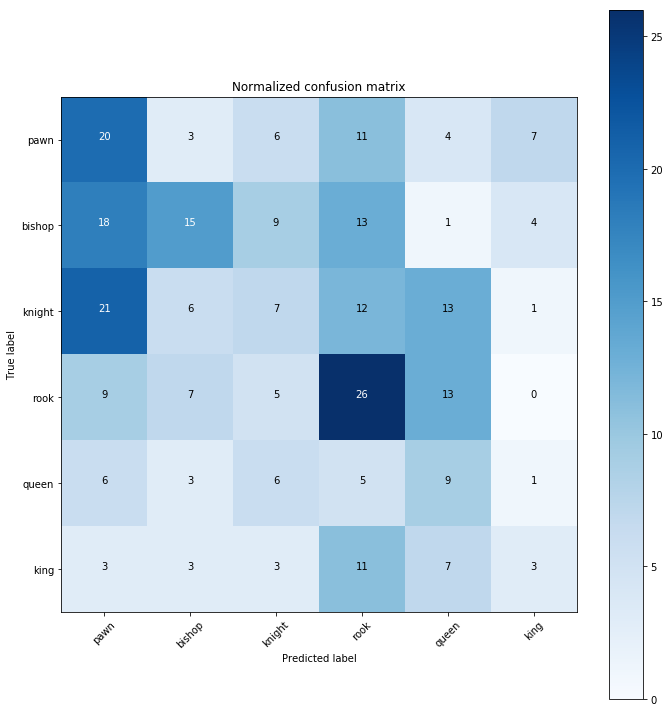

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.rcParams["figure.figsize"] = (10,10)
class_names = ["pawn", "bishop", "knight", "rook", "queen", "king"]

trained_model_path = "/home/anurag/AR/trained_models/23Mar/6_class_cnn_fine_tuned.hdf5"
trained_model = load_6_class_cnn_model(trained_model_path)

# trained_model.load_weights(filepath)

test_predictions = trained_model.predict(X_test, batch_size=batch_size)
y_test_pred = [np.argmax(x) for x in test_predictions]
cnf_matrix = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,title='Normalized confusion matrix')
print(accuracy_score(y_test, y_test_pred))

In [16]:
base_location = "/home/anurag/AR/analysis_results/24Mar"
def save_mispredicted_images(images, actual_values, predicted_values, mapping_func = None):
    # print(actual_values)
    mis_predictions = actual_values ^ predicted_values
    mis_prediction_indices = np.nonzero(mis_predictions)[0]
    print(mis_prediction_indices)
    
    num_failed_images = len(mis_prediction_indices)
    
    if num_failed_images == 0:
        print("All images predicted correctly.")
        return
        
    
    if num_failed_images == 1:
        print("{0} mispredicted as {1}".format(actual_values[mis_prediction_indices[0]], predicted_values[mis_prediction_indices[0]]))
        plt.imshow(images[mis_prediction_indices[0]], cmap='gray')
        return
    elif num_failed_images < IMAGES_PER_ROW:
        num_images_per_row = 2
    else:
        num_images_per_row = IMAGES_PER_ROW
        
    num_rows = (num_failed_images // num_images_per_row) + int((num_failed_images % num_images_per_row) != 0)
    if num_rows == 1:
        num_rows = 2

    print("Number of failed images: " + str(num_failed_images))
    print("Num rows: {0}. Num images/row: {1}".format(num_rows, num_images_per_row))
    #print(num_rows)
    #print(num_images_per_row)


    # fig, axes = plt.subplots(num_rows, num_images_per_row)

    current_image_idx = 0

    for itr in range(num_rows):
        #print(itr)
        for jtr in range(num_images_per_row):
            if current_image_idx == num_failed_images:
                break
            
            # print("{0}, {1}, {2}".format(itr, jtr, current_image_idx))
            
            # axes[itr, jtr].imshow(images[mis_prediction_indices[current_image_idx]], cmap='gray')
            if mapping_func:
                image_location = os.path.join(base_location, str(current_image_idx) + "_" + "{0}_as_{1}.jpg".format(mapping_func(actual_values[mis_prediction_indices[current_image_idx]]), mapping_func(predicted_values[mis_prediction_indices[current_image_idx]])))
                cv2.imwrite(image_location, images[mis_prediction_indices[current_image_idx]])
    
            else:
                image_location = os.path.join(base_location, str(current_image_idx) + "_" + "{0}_as_{1}.jpg".format(actual_values[mis_prediction_indices[current_image_idx]], predicted_values[mis_prediction_indices[current_image_idx]]))
                cv2.imwrite(image_location, images[mis_prediction_indices[current_image_idx]])
            #print(current_image_idx)
            current_image_idx += 1    

In [17]:
# test_images = np.squeeze(X_test)
reverse_label_mappings = {type_name_to_label[y]: y for y in type_name_to_label}
print(reverse_label_mappings)
save_mispredicted_images(test_images, y_test, y_test_pred, lambda x: reverse_label_mappings[x])
# plot_mispredicted_images(test_images, y_test, y_test_pred, lambda x: reverse_label_mappings[x])

{0: 'p', 1: 'b', 2: 'n', 3: 'r', 4: 'q', 5: 'k'}
[  0   1   2   3   5   6   8   9  10  15  16  17  18  20  21  23  24  25
  26  28  30  31  33  34  35  36  37  39  40  44  45  46  47  48  49  52
  53  54  58  59  60  61  63  66  68  69  71  73  75  76  77  79  80  81
  83  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101 102 104
 105 106 108 109 110 112 113 114 116 119 120 121 122 123 124 126 127 129
 131 132 133 134 136 138 139 140 141 142 144 145 147 148 149 150 151 152
 155 156 157 158 159 160 161 162 163 164 165 166 167 170 172 175 176 177
 178 179 181 182 183 184 185 186 187 191 192 193 196 197 201 202 203 204
 205 208 209 210 211 213 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 231 233 234 235 237 238 240 242 243 244 245 246 247 248 249
 252 253 254 255 257 258 260 262 263 265 266 267 268 270 271 272 273 276
 277 278 279 280 281 282 283 284 285 286 287 288 290]
Number of failed images: 211
Num rows: 43. Num images/row: 5
